<a href="https://colab.research.google.com/github/NoeDebrois/Artificial-NN-and-Deep-Learning/blob/main/Global_Average_Pooling_GAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks and Deep Learning

---

## Extra Material: Global Average pooling

## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab Notebooks/Artificial NN & Deep Learning

Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/Artificial NN & Deep Learning


## ⚙️ Import Libraries

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.0


## ⏳ Load Data

In [ ]:
# Load MNIST dataset and split into training-validation and test sets
(X_train_val_raw, y_train_val), (X_test_raw, y_test) = tfk.datasets.mnist.load_data()

# Map labels to digit names
labels = {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine'}

# Store unique digit labels
unique_labels = list(labels.values())

# Define function to add padding to images
def add_padding(image, pad_size):
    """
    Add padding to the image with specified pad size.
    Args:
        image: Input image array
        pad_size: Padding size to add to each side
    Returns:
        Padded image array
    """
    padded = np.pad(image,
                    pad_width=((pad_size, pad_size), (pad_size, pad_size)),
                    mode='constant',
                    constant_values=0)
    return padded

# Set padding size and apply padding to datasets
pad_size = 18
X_train_val = np.array([add_padding(img, pad_size) for img in X_train_val_raw])
X_test = np.array([add_padding(img, pad_size) for img in X_test_raw])

# Print original and padded image dimensions
print(f"Original image dimensions: {X_train_val_raw.shape[1]}x{X_train_val_raw.shape[2]}")
print(f"Padded image dimensions: {X_train_val.shape[1]}x{X_train_val.shape[2]}")

Original image dimensions: 28x28
Padded image dimensions: 64x64


## 🔎 Inspect Data

In [ ]:
# Print the shapes of the loaded datasets
print("Training-Validation Data Shape:", X_train_val.shape)
print("Training-Validation Label Shape:", y_train_val.shape)
print("Test Data Shape:", X_test.shape)
print("Test Label Shape:", y_test.shape)

Training-Validation Data Shape: (60000, 64, 64)
Training-Validation Label Shape: (60000,)
Test Data Shape: (10000, 64, 64)
Test Label Shape: (10000,)


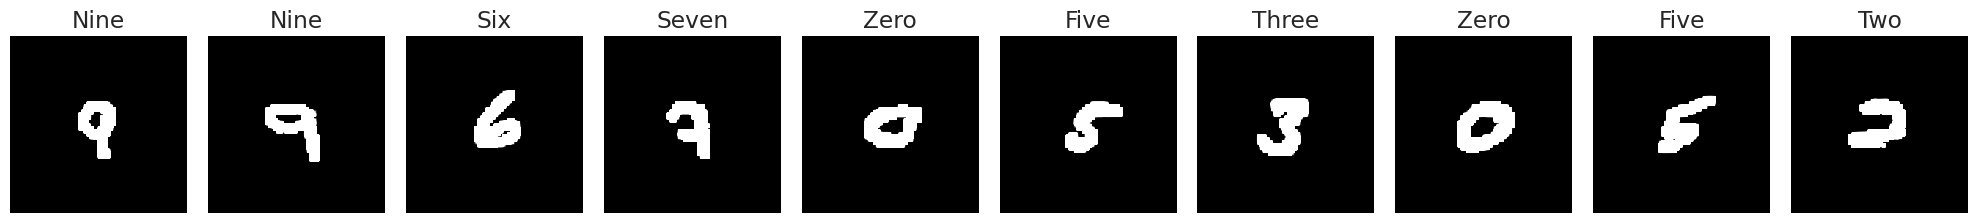

In [ ]:
# Display a sample of images from the training-validation dataset
num_img = 10
random_indices = random.sample(range(len(X_train_val)), num_img)

fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected number of images
for i, idx in enumerate(random_indices):
    ax = axes[i % num_img]
    ax.imshow(np.squeeze(X_train_val[idx]), vmin=0., vmax=1., cmap='gray')
    ax.set_title(f'{labels[y_train_val[idx]]}')
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

In [ ]:
# Inspect the target
print('Counting occurrences of target classes:')
print(pd.DataFrame(y_train_val, columns=['digit'])['digit'].value_counts())

Counting occurrences of target classes:
digit
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


## 🔄 Process Data

In [ ]:
# Normalize data to the range [0, 1]
X_train_val = np.expand_dims((X_train_val / 255), axis=-1).astype('float32')
X_test = np.expand_dims((X_test / 255), axis=-1).astype('float32')

# Convert labels to categorical format using one-hot encoding
y_train_val = tfk.utils.to_categorical(y_train_val)
y_test = tfk.utils.to_categorical(y_test)

In [ ]:
# Split data into training and validation sets, maintaining class distribution
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=seed, test_size=0.1, stratify=y_train_val)

# Print the shapes of the resulting datasets
print("Training Data Shape:", X_train.shape)
print("Training Label Shape:", y_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Validation Label Shape:", y_val.shape)

Training Data Shape: (54000, 64, 64, 1)
Training Label Shape: (54000, 10)
Validation Data Shape: (6000, 64, 64, 1)
Validation Label Shape: (6000, 10)


In [ ]:
# Compare categorical label and "default" label representation
# Display the categorical label
print('Categorical label:', y_train[0])
# Display the equivalent numeric label
print('"Default" label:', np.argmax(y_train[0]))

Categorical label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
"Default" label: 2


## 🧮 Define Network Parameters

In [ ]:
# Input shape for the model
input_shape = X_train.shape[1:]

# Output shape for the model
output_shape = y_train.shape[1]

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (64, 64, 1)
Output Shape: 10


In [ ]:
# Number of training epochs
epochs = 1000

# Batch size for training
batch_size = 128

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

# Print the defined parameters
print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rare:", learning_rate)

Epochs: 1000
Batch Size: 128
Learning Rare: 0.001


## 🛠️ Build the Model

In [ ]:
def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate,
    seed=seed
):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    inputs = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.Conv2D(filters=32, kernel_size=3, padding='same', name='conv1')(inputs)
    x = tfkl.Activation('relu', name='act1')(x)
    x = tfkl.MaxPooling2D(pool_size=2, name='mp1')(x)

    x = tfkl.Conv2D(filters=64, kernel_size=3, padding='same', name='conv2')(x)
    x = tfkl.Activation('relu', name='act2')(x)
    x = tfkl.MaxPooling2D(pool_size=2, name='mp2')(x)

    x = tfkl.Conv2D(filters=128, kernel_size=3, padding='same', name='conv3')(x)
    x = tfkl.Activation('relu', name='act3')(x)

    x = tfkl.Flatten(name='flatten')(x)

    x = tfkl.Dense(units=output_shape, name='dense')(x)
    outputs = tfkl.Activation('softmax', name='softmax')(x)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=inputs, outputs=outputs, name='CNN')

    # Compile the model
    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 64, 64, 1)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1 (Conv2D)                      │ (None, 64, 64, 32)           │           320 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ act1 (Activation)                   │ (None, 64, 64, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp1 (MaxPooling2D)                  │ (None, 32, 32, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2 (Conv2D)                      │ (None, 32, 32, 64)           │        18,496 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ act2 (Activation)                   │ (None, 32, 32, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp2 (MaxPooling2D)                  │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv3 (Conv2D)                      │ (None, 16, 16, 128)          │        73,856 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ act3 (Activation)                   │ (None, 16, 16, 128)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten (Flatten)                   │ (None, 32768)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 10)                   │       327,690 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ softmax (Activation)                │ (None, 10)                   │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 420,362 (1.60 MB)

 Trainable params: 420,362 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

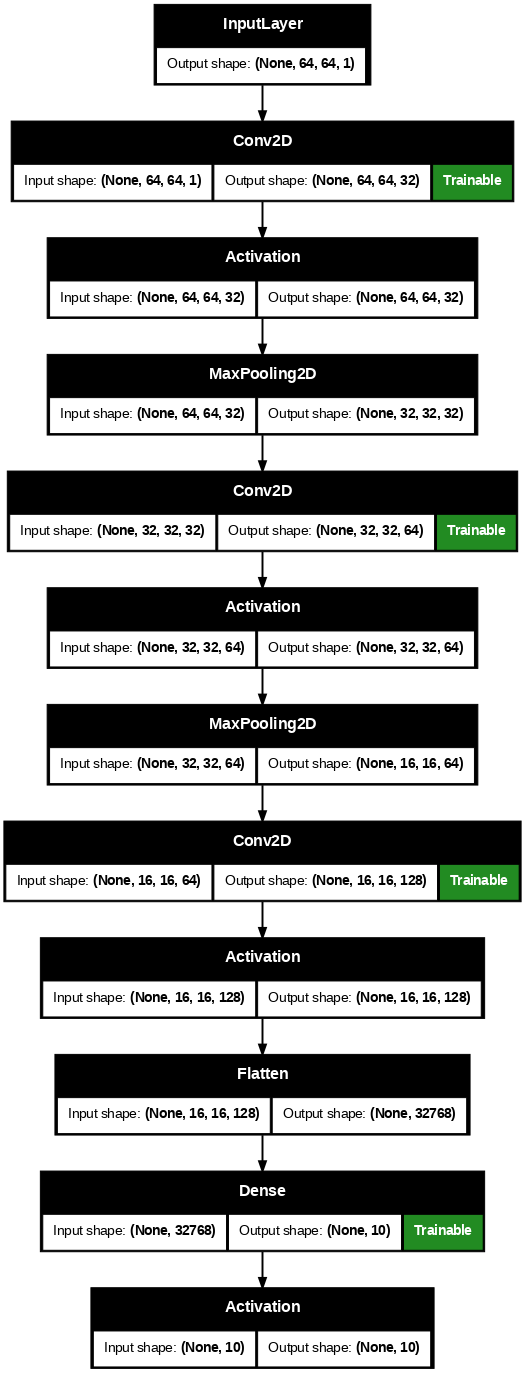

In [ ]:
# Build the model with specified input and output shapes
model = build_model()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

## 🧠 Train the Model

In [ ]:
# Define the patience value for early stopping
patience = 10

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

# Store the callback in a list
callbacks = [early_stopping]

In [ ]:
# Train the model with early stopping callback
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'MNIST_CNN_'+str(final_val_accuracy)+'.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8462 - loss: 0.4982 - val_accuracy: 0.9758 - val_loss: 0.0788
Epoch 2/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9820 - loss: 0.0561 - val_accuracy: 0.9817 - val_loss: 0.0623
Epoch 3/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9885 - loss: 0.0365 - val_accuracy: 0.9855 - val_loss: 0.0502
Epoch 4/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9870 - val_loss: 0.0425
Epoch 5/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9897 - val_loss: 0.0388
Epoch 6/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9950 - loss: 0.0151 - val_accuracy: 0.9863 - val_loss: 0.0508
Epoch 7/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9858 - val_loss: 0.0468
Epoch 8/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9964 - l

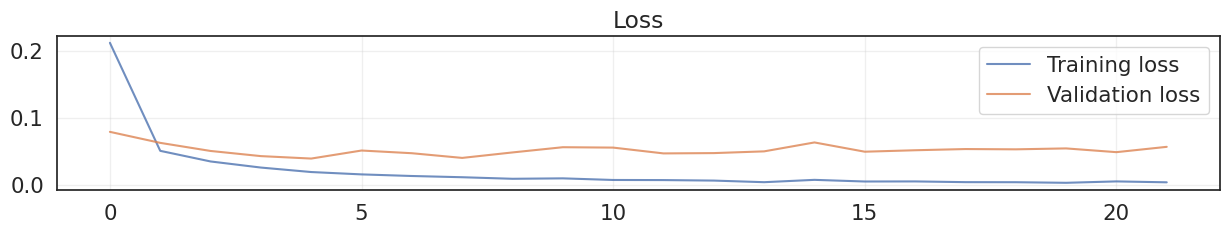

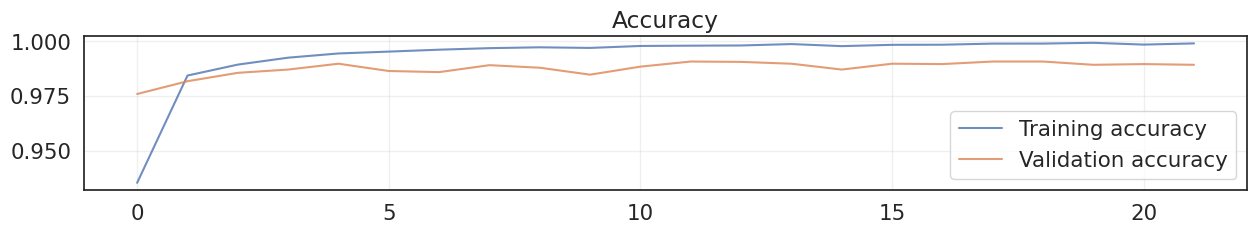

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

## 🛠️ Build the Model (with GAP)

In [ ]:
def build_model_with_gap(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate,
    seed=seed
):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    inputs = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.Conv2D(filters=32, kernel_size=3, padding='same', name='conv1')(inputs)
    x = tfkl.Activation('relu', name='act1')(x)
    x = tfkl.MaxPooling2D(pool_size=2, name='mp1')(x)

    x = tfkl.Conv2D(filters=64, kernel_size=3, padding='same', name='conv2')(x)
    x = tfkl.Activation('relu', name='act2')(x)
    x = tfkl.MaxPooling2D(pool_size=2, name='mp2')(x)

    x = tfkl.Conv2D(filters=128, kernel_size=3, padding='same', name='conv3')(x)
    x = tfkl.Activation('relu', name='act3')(x)

    x = tfkl.GlobalAveragePooling2D(name='gap')(x)

    x = tfkl.Dense(units=output_shape, name='dense')(x)
    outputs = tfkl.Activation('softmax', name='softmax')(x)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=inputs, outputs=outputs, name='CNN')

    # Compile the model
    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 64, 64, 1)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1 (Conv2D)                      │ (None, 64, 64, 32)           │           320 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ act1 (Activation)                   │ (None, 64, 64, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp1 (MaxPooling2D)                  │ (None, 32, 32, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2 (Conv2D)                      │ (None, 32, 32, 64)           │        18,496 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ act2 (Activation)                   │ (None, 32, 32, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp2 (MaxPooling2D)                  │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv3 (Conv2D)                      │ (None, 16, 16, 128)          │        73,856 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ act3 (Activation)                   │ (None, 16, 16, 128)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ gap (GlobalAveragePooling2D)        │ (None, 128)                  │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 10)                   │         1,290 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ softmax (Activation)                │ (None, 10)                   │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

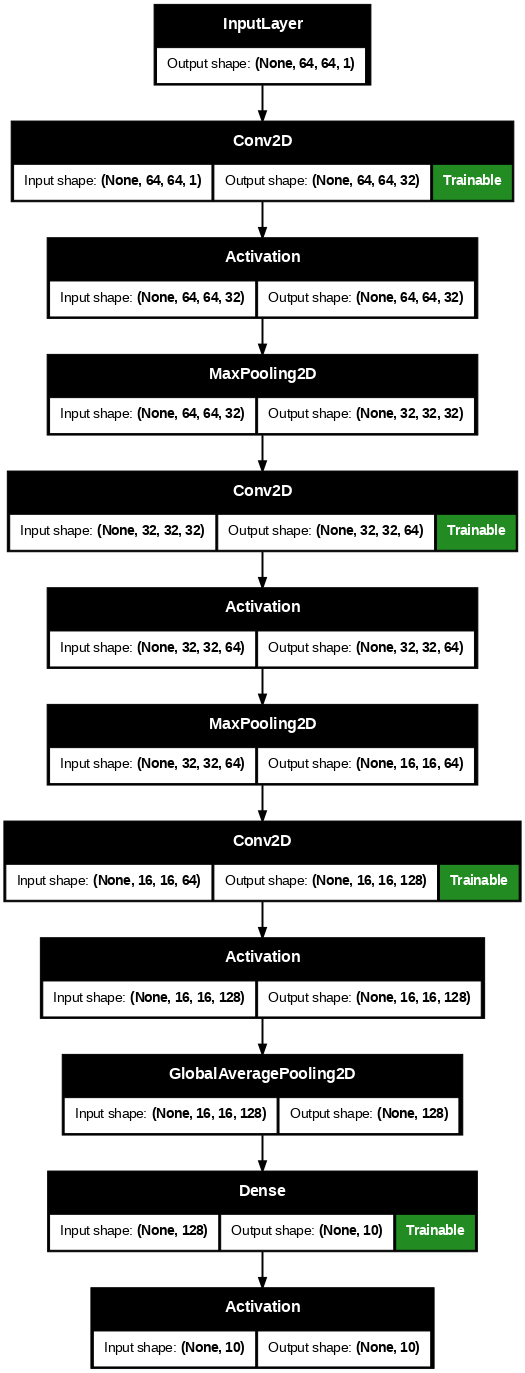

In [ ]:
# Build the model with specified input and output shapes
model = build_model_with_gap()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

## 🧠 Train the Model

In [ ]:
# Define the patience value for early stopping
patience = 10

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

# Store the callback in a list
callbacks = [early_stopping]

In [ ]:
# Train the model with early stopping callback
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'MNIST_CNN_GAP_'+str(final_val_accuracy)+'.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4083 - loss: 1.6724 - val_accuracy: 0.8550 - val_loss: 0.5087
Epoch 2/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8857 - loss: 0.3954 - val_accuracy: 0.9218 - val_loss: 0.2707
Epoch 3/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9231 - loss: 0.2568 - val_accuracy: 0.9415 - val_loss: 0.1991
Epoch 4/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9392 - loss: 0.2048 - val_accuracy: 0.9518 - val_loss: 0.1648
Epoch 5/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9466 - loss: 0.1765 - val_accuracy: 0.9558 - val_loss: 0.1501
Epoch 6/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9524 - loss: 0.1561 - val_accuracy: 0.9562 - val_loss: 0.1426
Epoch 7/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9573 - loss: 0.1405 - val_accuracy: 0.9567 - val_loss: 0.1365
Epoch 8/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9606 - lo

## 🕹️ Use the Model - Make Inference

In [ ]:
# Load the saved models
model_flatten = tfk.models.load_model('MNIST_CNN_99.07.keras')
model_gap = tfk.models.load_model('MNIST_CNN_GAP_98.57.keras')

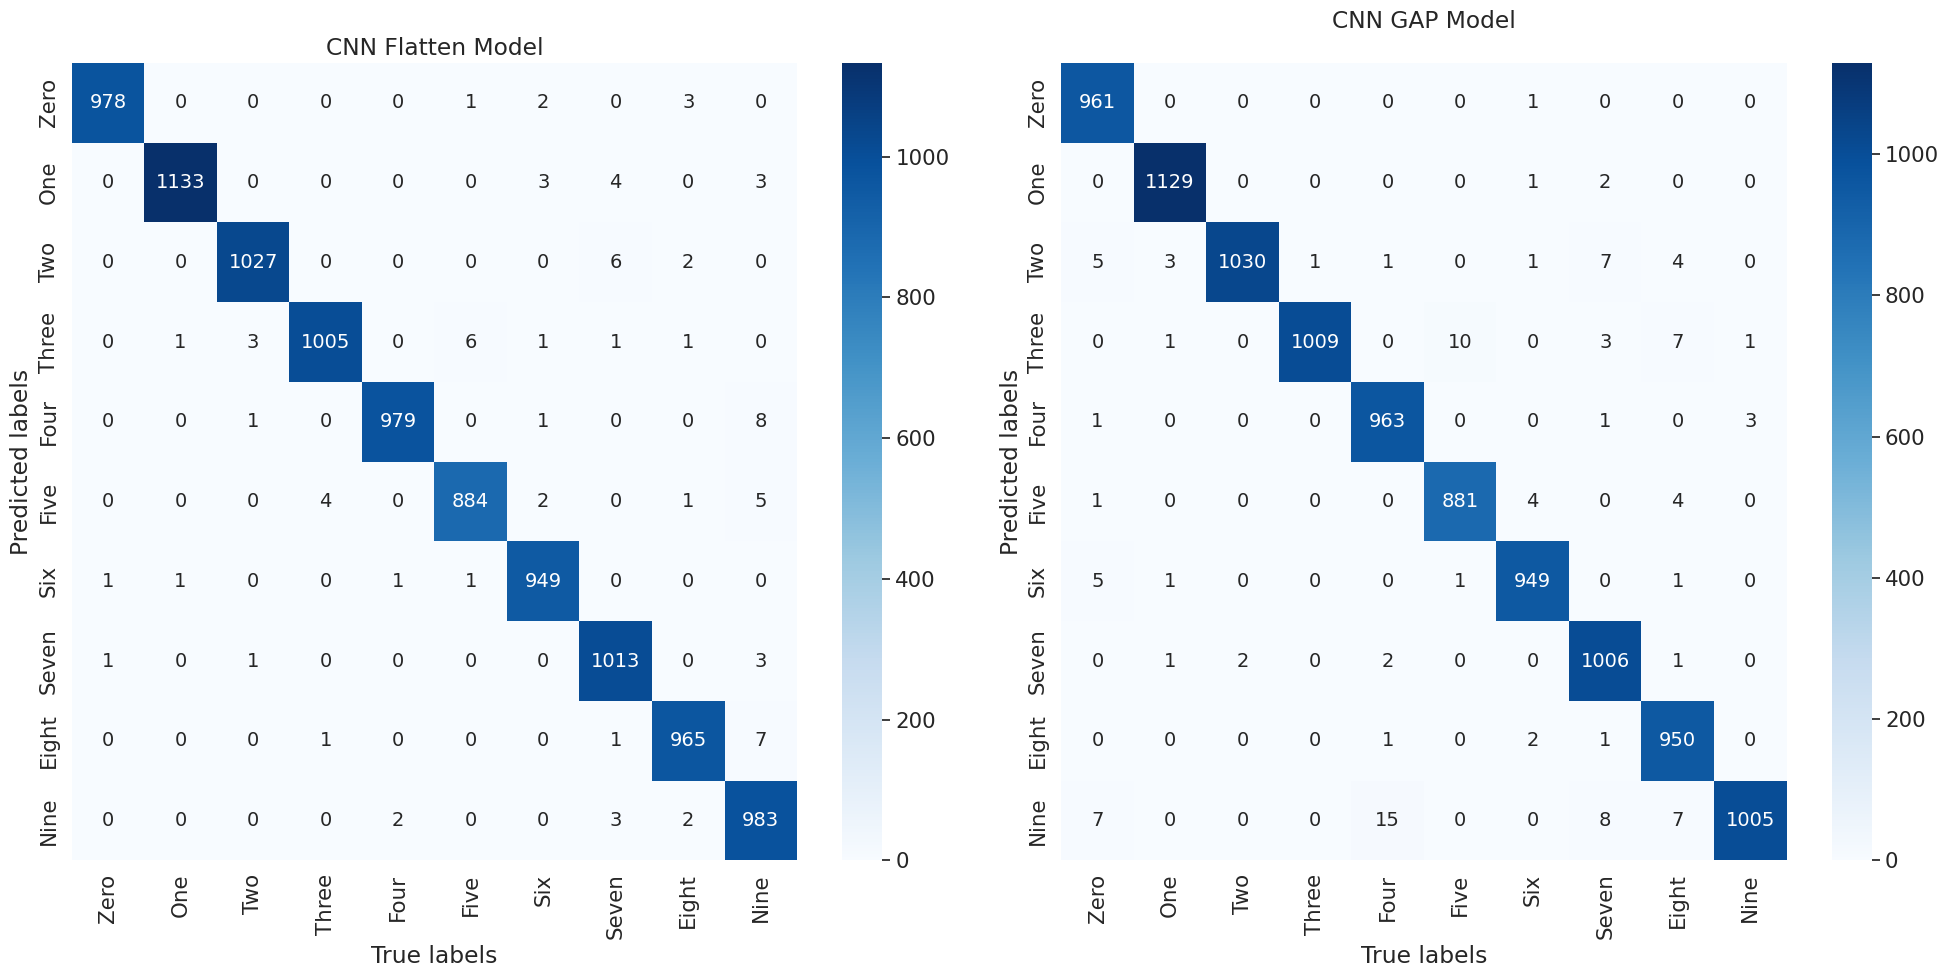


CNN Flatten Model Metrics:
Accuracy: 0.9916
Precision: 0.9916
Recall: 0.9916
F1: 0.9916

CNN GAP Model Metrics:
Accuracy: 0.9883
Precision: 0.9885
Recall: 0.9883
F1: 0.9883


In [ ]:
# Function to compute all metrics and confusion matrix
def evaluate_model(model, X_test, y_test, labels):
    # Predict labels
    predictions = model.predict(X_test, verbose=0)
    pred_classes = np.argmax(predictions, axis=-1)
    # Convert y_test to multiclass format
    true_classes = np.argmax(y_test, axis=-1) # Convert y_test to class indices

    # Calculate metrics
    metrics = {
        'accuracy': round(accuracy_score(true_classes, pred_classes), 4),
        'precision': round(precision_score(true_classes, pred_classes, average='weighted'), 4),
        'recall': round(recall_score(true_classes, pred_classes, average='weighted'), 4),
        'f1': round(f1_score(true_classes, pred_classes, average='weighted'), 4)
    }

    # Compute confusion matrix
    cm = confusion_matrix(true_classes, pred_classes)

    return metrics, cm

# Evaluate both models
metrics_flatten, cm_flatten = evaluate_model(model_flatten, X_test, y_test, labels)
metrics_gap, cm_gap = evaluate_model(model_gap, X_test, y_test, labels)

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot confusion matrix for Flatten model
sns.heatmap(cm_flatten.T, annot=True, fmt='d', xticklabels=list(labels.values()),
            yticklabels=list(labels.values()), cmap='Blues', ax=ax1)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title('CNN Flatten Model')

# Plot confusion matrix for GAP model
sns.heatmap(cm_gap.T, annot=True, fmt='d', xticklabels=list(labels.values()),
            yticklabels=list(labels.values()), cmap='Blues', ax=ax2)
ax2.set_xlabel('True labels')
ax2.set_ylabel('Predicted labels')
ax2.set_title('CNN GAP Model\n')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nCNN Flatten Model Metrics:")
for metric, value in metrics_flatten.items():
    print(f'{metric.capitalize()}: {value}')

print("\nCNN GAP Model Metrics:")
for metric, value in metrics_gap.items():
    print(f'{metric.capitalize()}: {value}')

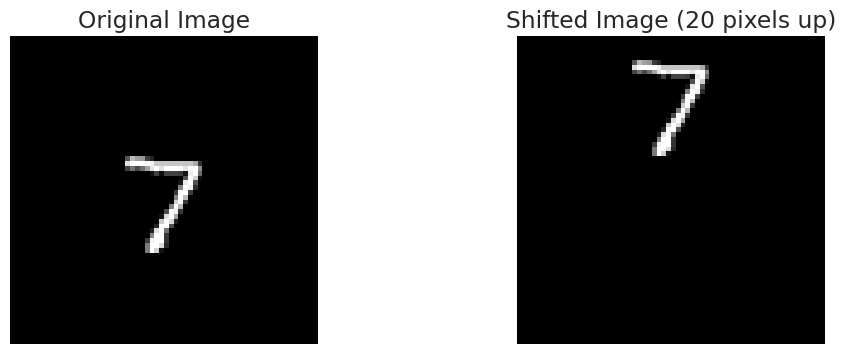

In [ ]:
# Function to shift image up
def shift_up(image, shift_pixels=20):
    """
    Shifts image up by specified number of pixels
    Args:
        image: input image
        shift_pixels: number of pixels to shift up
    Returns:
        shifted image
    """
    shifted = np.zeros_like(image)
    shifted[:-shift_pixels] = image[shift_pixels:]  # Move content up
    return shifted

# Apply shift to X_test
X_test_shifted = np.array([shift_up(img) for img in X_test])

# Visualize an example to verify the shift
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(X_test[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(X_test_shifted[0], cmap='gray')
plt.title('Shifted Image (20 pixels up)')
plt.axis('off')

plt.show()

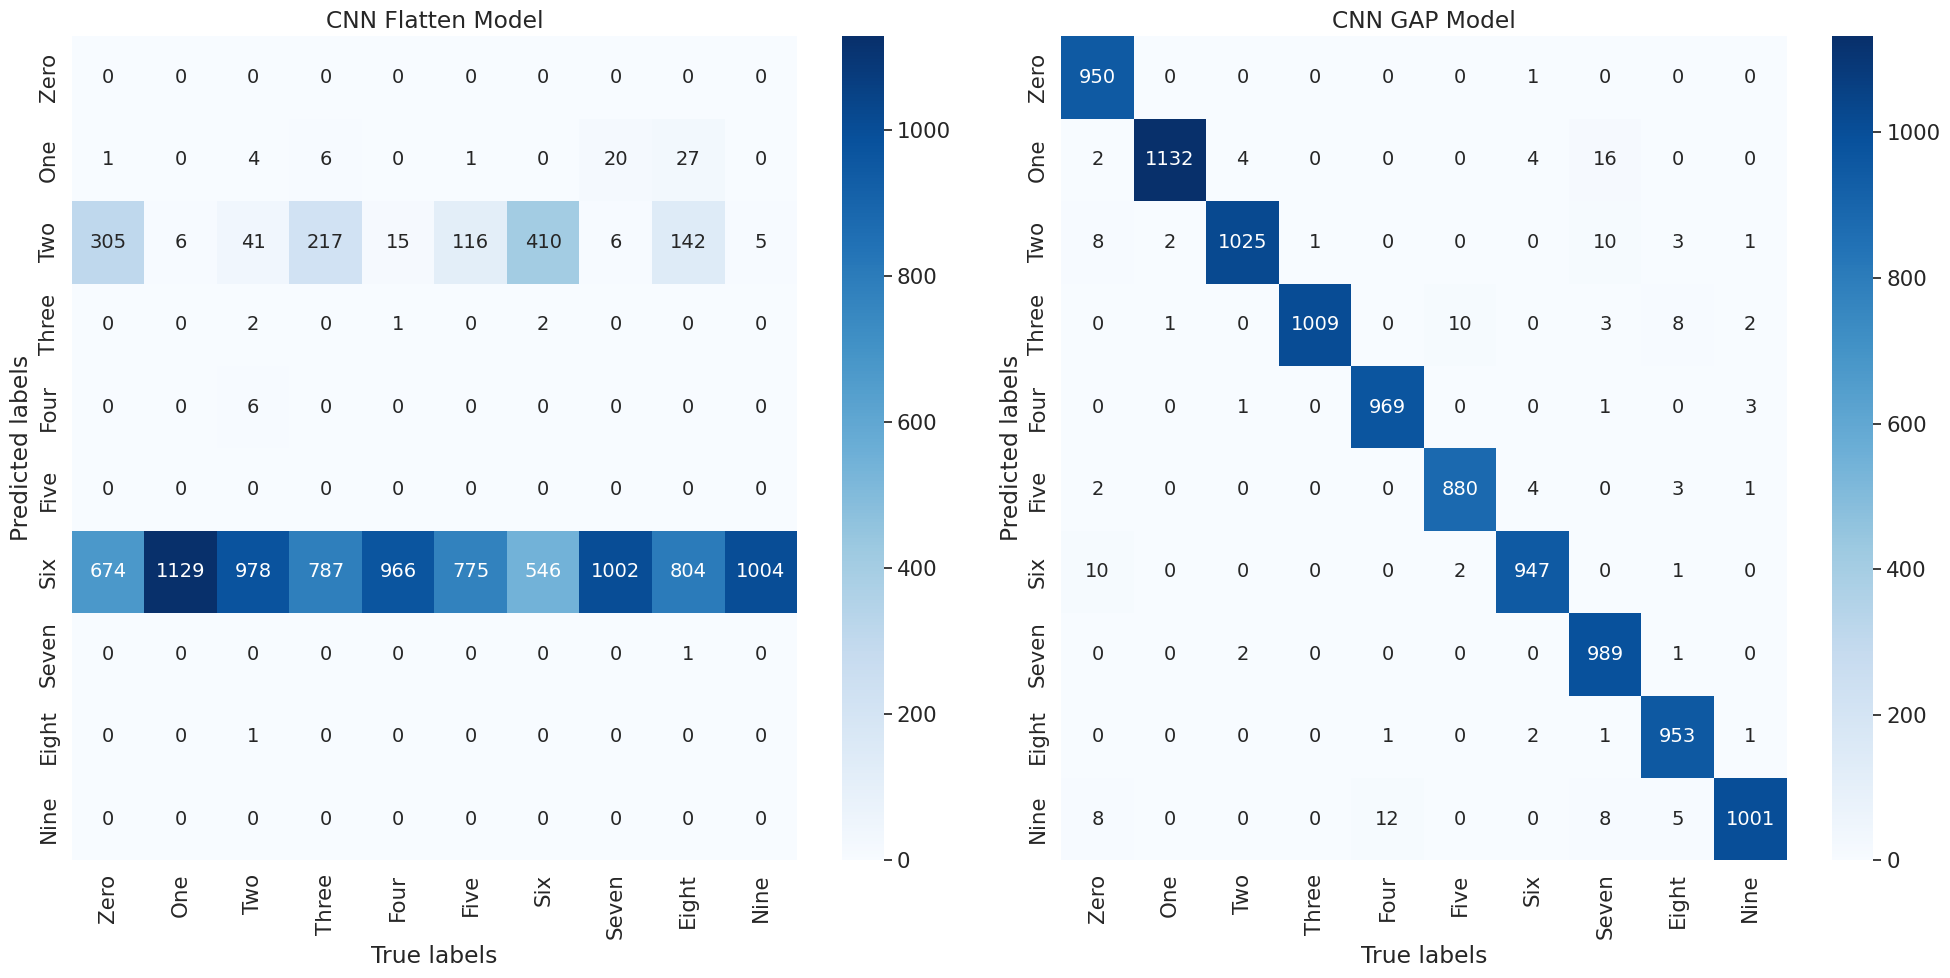


CNN Flatten Model Metrics:
Accuracy: 0.0587
Precision: 0.0094
Recall: 0.0587
F1: 0.0146

CNN GAP Model Metrics:
Accuracy: 0.9855
Precision: 0.9857
Recall: 0.9855
F1: 0.9855


In [ ]:
# Evaluate both models
metrics_flatten, cm_flatten = evaluate_model(model_flatten, X_test_shifted, y_test, labels)
metrics_gap, cm_gap = evaluate_model(model_gap, X_test_shifted, y_test, labels)

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot confusion matrix for Flatten model
sns.heatmap(cm_flatten.T, annot=True, fmt='d', xticklabels=list(labels.values()),
            yticklabels=list(labels.values()), cmap='Blues', ax=ax1)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title('CNN Flatten Model')

# Plot confusion matrix for GAP model
sns.heatmap(cm_gap.T, annot=True, fmt='d', xticklabels=list(labels.values()),
            yticklabels=list(labels.values()), cmap='Blues', ax=ax2)
ax2.set_xlabel('True labels')
ax2.set_ylabel('Predicted labels')
ax2.set_title('CNN GAP Model')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nCNN Flatten Model Metrics:")
for metric, value in metrics_flatten.items():
    print(f'{metric.capitalize()}: {value}')

print("\nCNN GAP Model Metrics:")
for metric, value in metrics_gap.items():
    print(f'{metric.capitalize()}: {value}')

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Eugenio Lomurno 📧 eugenio.lomurno@polimi.it





```
   Copyright 2024 Eugenio Lomurno

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```
